In [1]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random as r

### Loading the dataset and exploring the datatypes and the distribution 

In [2]:
# loading data set.showing first 5 rows
df=pd.read_csv('file.csv')
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [3]:
Loan_ID=df['Loan_ID']

In [4]:
len(Loan_ID)

273850

In [5]:
type(Loan_ID)

pandas.core.series.Series

In [6]:
# information of the data. 
# checking the data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  273850 non-null  int64  
 1   Loan_Amount_Requested    273850 non-null  object 
 2   Length_Employed          261543 non-null  object 
 3   Home_Owner               231790 non-null  object 
 4   Annual_Income            231850 non-null  float64
 5   Income_Verified          273850 non-null  object 
 6   Purpose_Of_Loan          273850 non-null  object 
 7   Debt_To_Income           273850 non-null  float64
 8   Inquiries_Last_6Mo       273850 non-null  int64  
 9   Months_Since_Deliquency  126612 non-null  float64
 10  Number_Open_Accounts     273850 non-null  int64  
 11  Total_Accounts           273850 non-null  int64  
 12  Gender                   273850 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 27.2+ MB


In [7]:
df['Loan_Amount_Requested']=df['Loan_Amount_Requested'].apply(lambda x:x.replace(',',''))

In [8]:
pd.to_numeric(df['Loan_Amount_Requested'],downcast='float')

0         27500.0
1         26000.0
2          6075.0
3         12000.0
4         35000.0
           ...   
273845    20725.0
273846     6000.0
273847    20250.0
273848    10000.0
273849     9250.0
Name: Loan_Amount_Requested, Length: 273850, dtype: float32

In [9]:
#We need to check the distribution of the data.
df.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts
count,2.738500e+05,2.318500e+05,273850.000000,273850.000000,126612.000000,273850.000000,273850.000000
mean,1.013693e+07,7.339279e+04,17.215901,0.784543,34.103395,11.186025,25.067975
std,7.905383e+04,5.852984e+04,7.845967,1.036816,21.750307,4.973663,11.589677
min,1.000000e+07,3.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.006846e+07,4.500000e+04,11.360000,0.000000,16.000000,8.000000,17.000000
50%,1.013693e+07,6.300000e+04,16.850000,0.000000,31.000000,10.000000,23.000000
75%,1.020539e+07,8.900000e+04,22.780000,1.000000,49.000000,14.000000,32.000000
max,1.027385e+07,7.500000e+06,39.990000,8.000000,180.000000,84.000000,156.000000


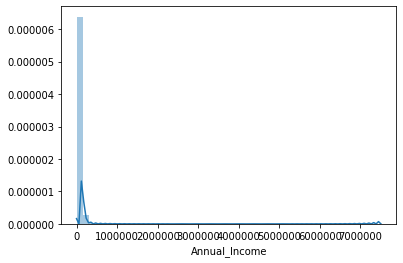

In [10]:
# checking the distribution of annual income.
sns.distplot(df['Annual_Income'])

In [11]:

exp=['10+ years','9 years','8 years','7 years','6 years',
     '5 years','4 years','3 years','2 years','1 year','<1 year']

In [12]:
emp_exp_salmean=pd.DataFrame([df[df['Length_Employed']=='10+ years']['Annual_Income'].mean(),
df[df['Length_Employed']=='9 years']['Annual_Income'].mean(),
df[df['Length_Employed']=='8 years']['Annual_Income'].mean(),
df[df['Length_Employed']=='7 years']['Annual_Income'].mean(),
df[df['Length_Employed']=='6 years']['Annual_Income'].mean(),
df[df['Length_Employed']=='5 years']['Annual_Income'].mean(),
df[df['Length_Employed']=='4 years']['Annual_Income'].mean(),
df[df['Length_Employed']=='3 years']['Annual_Income'].mean(),
df[df['Length_Employed']=='2 years']['Annual_Income'].mean(),
df[df['Length_Employed']=='1 year']['Annual_Income'].mean(),
df[df['Length_Employed']=='< 1 year']['Annual_Income'].mean()],columns=['Before impute Ann_inc'],index=exp)

In [13]:
# checking average salary for each year.
emp_exp_salmean

,Before impute Ann_inc
10+ years,80274.598207
9 years,74746.396412
8 years,74649.514489
7 years,73295.970365
6 years,72207.201506
5 years,72568.713633
4 years,71144.528381
3 years,71957.938581
2 years,71205.401656
1 year,69193.709953


### Checking for the no of null null values in the dataset 

In [14]:
# checking for null values.
df.isnull().sum()

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
dtype: int64

## Checking duplicates

In [15]:
df[df.duplicated()]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender


##### There are no duplicates in the data

### Imputing null values

## Annual income

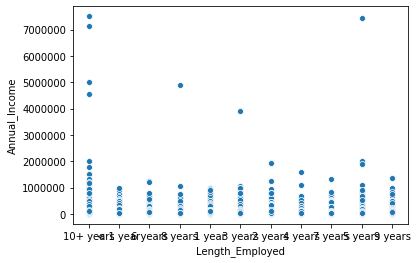

In [16]:
# checking the relation between Length_Employed and Annual_Income
sns.scatterplot(x=df['Length_Employed'],y=df['Annual_Income'])

In [17]:
#we need to impute null values of anual income.
#we found the the best value is 73000 to impute, after multiple attempts.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=73000)
df['Annual_Income']=imp.fit_transform(df[['Annual_Income']])
df

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,27500,10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,26000,10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,6075,< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,12000,10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,35000,< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273845,10164305,20725,10+ years,Rent,73000.0,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male
273846,10164306,6000,8 years,Own,73000.0,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male
273847,10164307,20250,10+ years,Mortgage,73000.0,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male
273848,10164308,10000,4 years,Rent,73000.0,not verified,major_purchase,18.75,1,48.0,16,62,Female


In [18]:
# checking for null values after imputing annual income
df.isnull().sum()

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed             12307
Home_Owner                  42060
Annual_Income                   0
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
dtype: int64

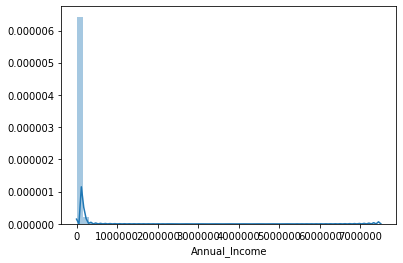

In [19]:
# checking the data distribution after imputing annual income
sns.distplot(df['Annual_Income'])

### inference

We imputed annual income with 73000 a constant value majorly because there were no particular 
relation between Salary and the length employed,debt to income or other columns .and most of them
in te dataset were 10+ years of experience and had high to moderate debt to income .Hence we came 
up to this constant value through trial and error


## Length employed

In [20]:
#checked null values of Length_Employed
len_emp_null=df[df['Length_Employed'].isna()]
len_emp_null

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
12,10164322,25000,NaN,Own,65000.00,VERIFIED - income,credit_card,20.25,0,NaN,6,21,Female
56,10164366,30000,NaN,Own,80000.00,VERIFIED - income,credit_card,20.05,0,NaN,8,26,Male
105,10164415,4000,NaN,Rent,29409.00,VERIFIED - income,credit_card,14.20,1,20.0,20,38,Male
110,10164420,18900,NaN,Mortgage,56000.00,VERIFIED - income,debt_consolidation,15.97,1,NaN,10,24,Female
198,10164508,24000,NaN,Mortgage,75500.00,VERIFIED - income,home_improvement,10.98,1,NaN,5,13,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273809,10164269,19750,NaN,Own,33664.44,VERIFIED - income,credit_card,17.40,0,NaN,8,12,Female
273813,10164273,10000,NaN,Own,28721.40,VERIFIED - income,debt_consolidation,33.42,1,73.0,14,16,Male
273830,10164290,8000,NaN,Rent,73000.00,VERIFIED - income source,debt_consolidation,21.08,3,NaN,6,19,Male
273835,10164295,13700,NaN,Mortgage,55000.00,VERIFIED - income,debt_consolidation,32.92,0,NaN,15,38,Male


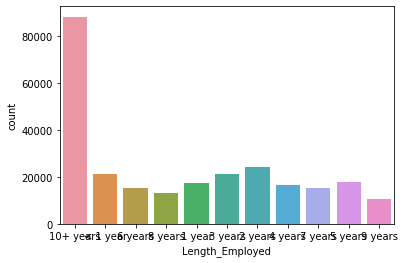

In [21]:
# viusal presentation of null values of Length_Employed
sns.countplot(df['Length_Employed'])

In [22]:
#This is after imputing salary with 73000 which is the mode value of the Annual_income
emp_exp_salmean

,Before impute Ann_inc
10+ years,80274.598207
9 years,74746.396412
8 years,74649.514489
7 years,73295.970365
6 years,72207.201506
5 years,72568.713633
4 years,71144.528381
3 years,71957.938581
2 years,71205.401656
1 year,69193.709953


In [23]:
#Checking null values of length employed
df_ind=df[df['Length_Employed'].isna()].index

In [24]:
#Check the value counts of length employed
df['Length_Employed'].value_counts()

10+ years    88328
2 years      24420
3 years      21478
< 1 year     21133
5 years      18042
1 year       17336
4 years      16393
7 years      15444
6 years      15351
8 years      13115
9 years      10503
Name: Length_Employed, dtype: int64

In [25]:
len_emp_null

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
12,10164322,25000,NaN,Own,65000.00,VERIFIED - income,credit_card,20.25,0,NaN,6,21,Female
56,10164366,30000,NaN,Own,80000.00,VERIFIED - income,credit_card,20.05,0,NaN,8,26,Male
105,10164415,4000,NaN,Rent,29409.00,VERIFIED - income,credit_card,14.20,1,20.0,20,38,Male
110,10164420,18900,NaN,Mortgage,56000.00,VERIFIED - income,debt_consolidation,15.97,1,NaN,10,24,Female
198,10164508,24000,NaN,Mortgage,75500.00,VERIFIED - income,home_improvement,10.98,1,NaN,5,13,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273809,10164269,19750,NaN,Own,33664.44,VERIFIED - income,credit_card,17.40,0,NaN,8,12,Female
273813,10164273,10000,NaN,Own,28721.40,VERIFIED - income,debt_consolidation,33.42,1,73.0,14,16,Male
273830,10164290,8000,NaN,Rent,73000.00,VERIFIED - income source,debt_consolidation,21.08,3,NaN,6,19,Male
273835,10164295,13700,NaN,Mortgage,55000.00,VERIFIED - income,debt_consolidation,32.92,0,NaN,15,38,Male


In [26]:
#imputing null values in length employed with ffill
df['Length_Employed'].fillna(method='ffill',inplace=True)

### inference

In length employed most values are 10+ years of experience.Hence we imputed the column with ffill
forr null values so that the distribution of the data does not change drastically even after
changing values.

In [27]:
df.isna().sum()

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed                 0
Home_Owner                  42060
Annual_Income                   0
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
dtype: int64

## Home Owner

In [28]:
#Checking indices where home owner is null
df_home_ind=df[df['Home_Owner'].isna()].index
df_home_ind

Int64Index([     1,      6,      7,     13,     15,     16,     17,     18,
                21,     28,
            ...
            273771, 273778, 273794, 273797, 273814, 273816, 273817, 273818,
            273827, 273843],
           dtype='int64', length=42060)

In [29]:
#Checking home owner data before imputing null values
df_home_owner_val_perc_bef_imp=df['Home_Owner'].value_counts()/len(df)*100
df_home_owner_val_perc_bef_imp

Mortgage    42.822713
Rent        34.158116
Own          7.624247
Other        0.028848
None         0.007303
Name: Home_Owner, dtype: float64

#### Checking distribution of home owner data before imputing

In [30]:
#Imputing home owner with ffill
df['Home_Owner'].fillna(method='ffill',inplace=True)

In [31]:
#Checking null values again after imputing home

In [32]:
df.isna().sum()

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed                 0
Home_Owner                      0
Annual_Income                   0
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
dtype: int64

In [33]:
df_home_owner_val_perc_aft_imp=df['Home_Owner'].value_counts()/len(df)*100
df_home_owner_val_perc_aft_imp

Mortgage    50.642322
Rent        40.338872
Own          8.979003
Other        0.032134
None         0.007668
Name: Home_Owner, dtype: float64

In [34]:
df_home_own=pd.DataFrame(data=[df_home_owner_val_perc_bef_imp,df_home_owner_val_perc_aft_imp],
             index=['home_owner_val_perc_bef_imp','home_owner_val_perc_aft_imp'])

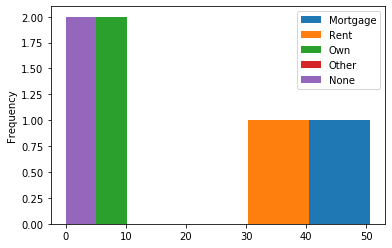

In [35]:
df_home_own.plot(kind='hist')

### inference

In home owner most of the clients are either on mortgage or rent .Very few of them have own house .
Hence ffill would help us to proportion of the distribution in tact even after imputation.

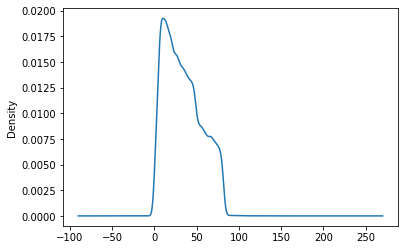

In [36]:
df['Months_Since_Deliquency'].plot(kind='kde')

In [37]:
#Checking null values for months since deliquency
df_len_emp_na=df[df['Months_Since_Deliquency'].isna()]

In [38]:
#forward filling the null values
df['Months_Since_Deliquency'].fillna(method='ffill',inplace=True)

0.4663166193853745


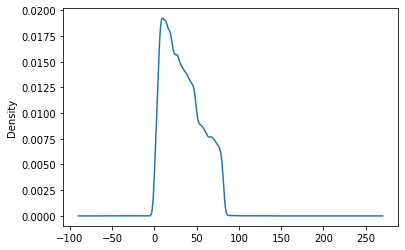

In [39]:
#Checking distribution of months since deliquency after imputing null values
df['Months_Since_Deliquency'].plot(kind='kde')
print(df['Months_Since_Deliquency'].skew())

### inference

Months since deliquency has varied amount of values largely between 0 to 100.Hence ffill helps us 
maintain the distribution intact .If we go with mean or median may not be ideal as there are quite a lot of outliers in the data

In [40]:
#All null values are imputed
df.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
dtype: int64

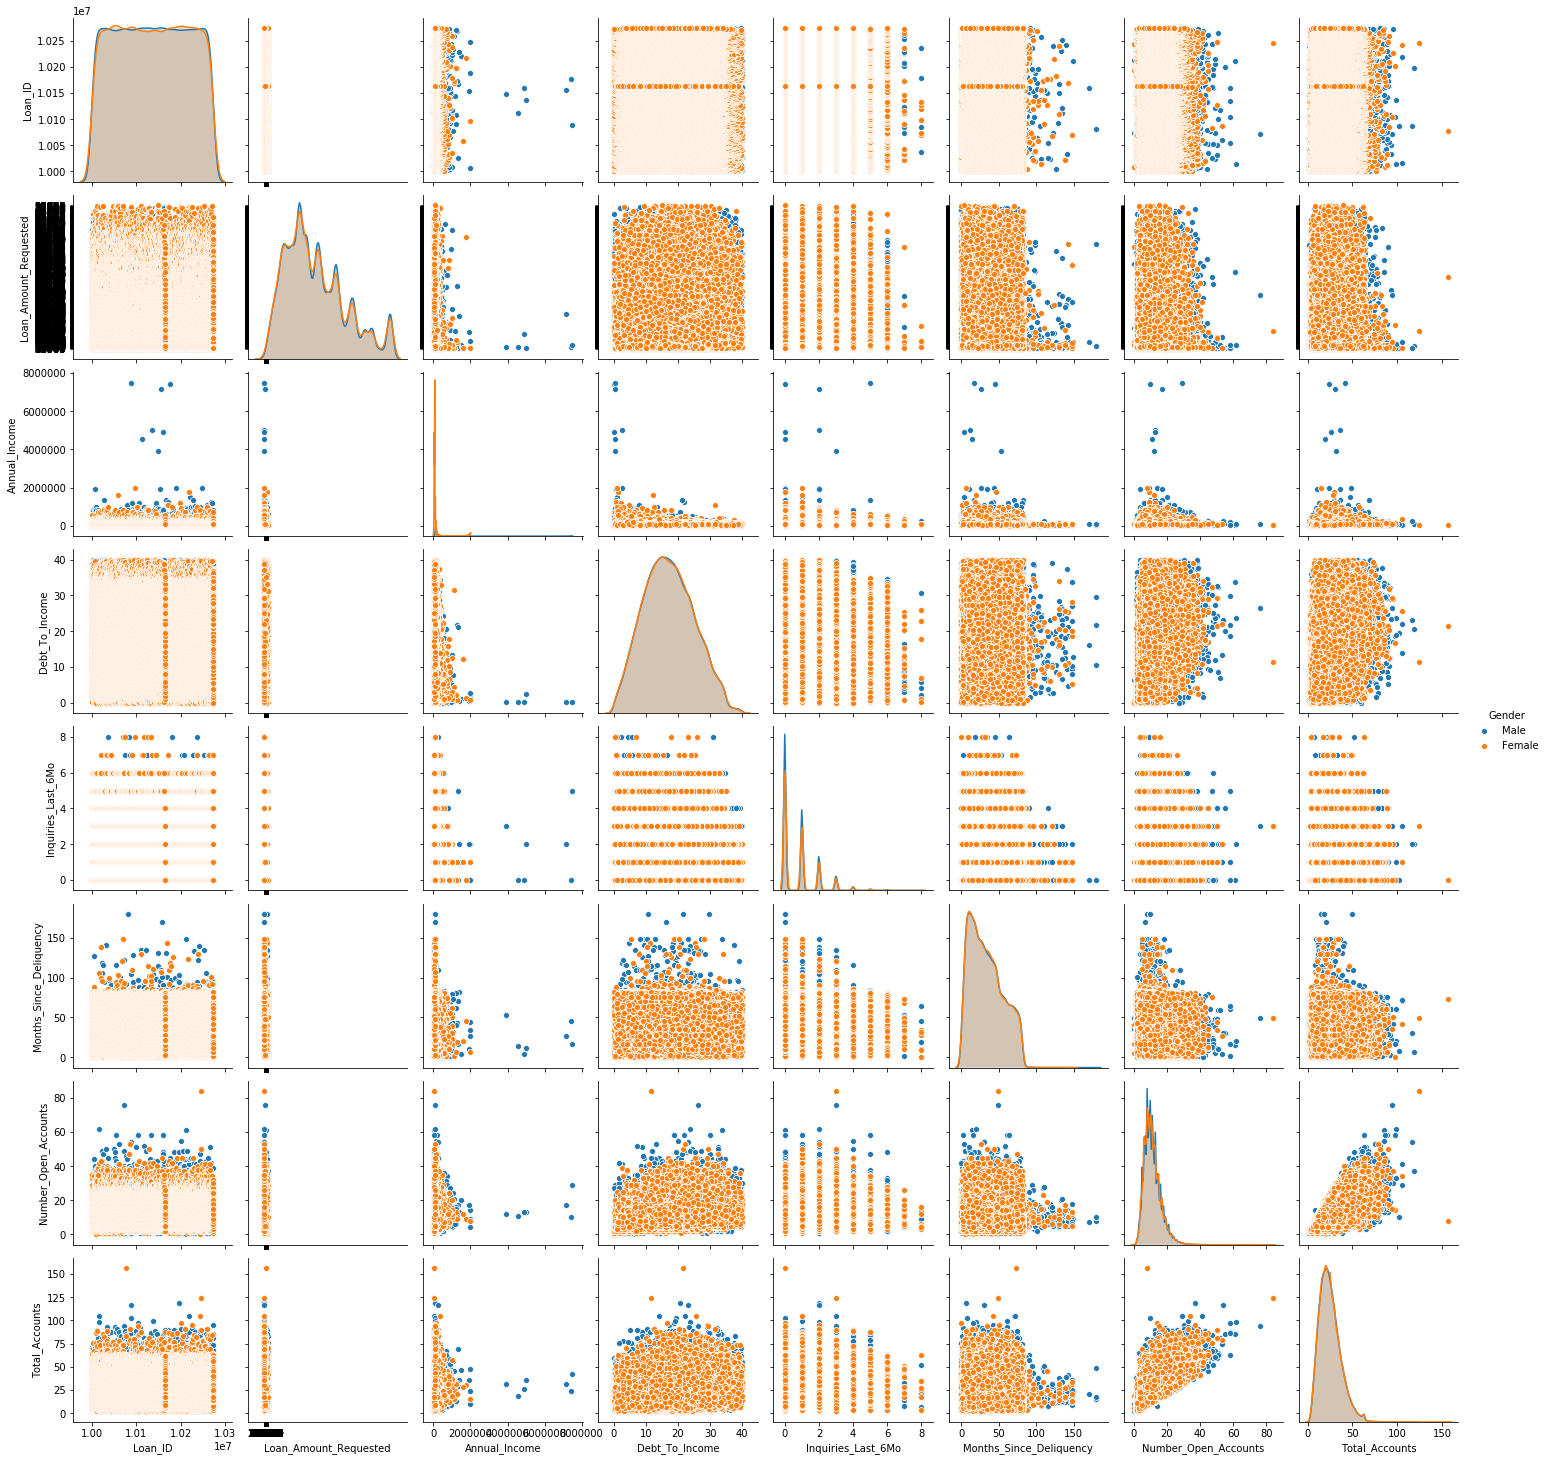

In [41]:
sns.pairplot(df,diag_kind='kde',hue='Gender')

## Building the base model

In [42]:
df1=df.drop(['Loan_ID','Length_Employed','Home_Owner','Income_Verified','Purpose_Of_Loan','Gender'],axis=1)
#only numeric features included

In [43]:
X=df1
X

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts
0,27500,129000.0,12.87,0,68.0,10,37
1,26000,110000.0,11.37,0,68.0,6,23
2,6075,75000.0,6.83,2,68.0,5,20
3,12000,73000.0,7.76,0,68.0,6,8
4,35000,156000.0,9.62,0,26.0,9,21
...,...,...,...,...,...,...,...
273845,20725,73000.0,13.56,0,37.0,13,16
273846,6000,73000.0,9.12,0,36.0,13,30
273847,20250,73000.0,18.17,1,36.0,17,30
273848,10000,73000.0,18.75,1,48.0,16,62


In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6
0,1.586075,1.033657,-0.553904,-0.756686,1.556353,-0.238462,1.029541
1,1.405112,0.680857,-0.745085,-0.756686,1.556353,-1.042699,-0.178433
2,-0.998669,0.030962,-1.323727,1.172300,1.556353,-1.243759,-0.437284
3,-0.283869,-0.006175,-1.205195,-0.756686,1.556353,-1.042699,-1.472690
4,2.490886,1.535004,-0.968130,-0.756686,-0.374682,-0.439521,-0.351001
...,...,...,...,...,...,...,...
273845,0.768729,-0.006175,-0.465960,-0.756686,0.131065,0.364717,-0.782420
273846,-1.007718,-0.006175,-1.031857,-0.756686,0.085088,0.364717,0.425554
273847,0.711424,-0.006175,0.121604,0.207807,0.085088,1.168954,0.425554
273848,-0.525152,-0.006175,0.195527,0.207807,0.636813,0.967895,3.186637


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test=train_test_split(X,test_size=0.30,random_state=10)

In [47]:
from sklearn.cluster import KMeans

In [48]:
wcss = []
for k in range(1,8):
    
    # fit K-means clustering with number of clusters K
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    
    # use 'inertia_' to get wcss 
    # append the value of WCSS for each K to the list 'wcss'
    wcss.append(kmeans.inertia_)

# print the within cluster sum of squares
print(wcss)

[1364665.4876021983, 1119810.9805237125, 1019550.5518470533, 934637.389648566, 859531.8526101654, 782199.6374607323, 723243.2141358798]


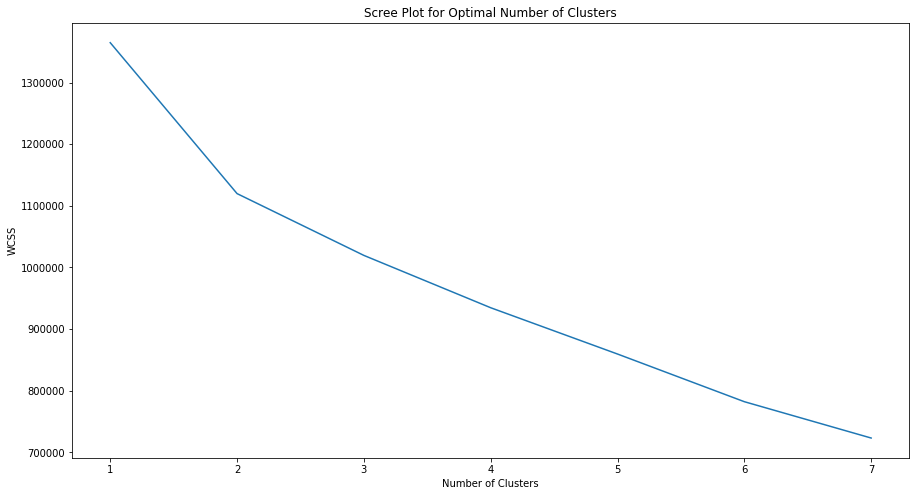

In [49]:
# set the plot size using 'figsize'
plt.figure(figsize=(15,8))

# plot the elbow plot
# pass the values for K and WCSS
# last number in the range() is exclusive
plt.plot(range(1,8), wcss) 

# set the axes and plot labels
plt.xlabel("Number of Clusters")
plt.title('Scree Plot for Optimal Number of Clusters')
plt.ylabel("WCSS")

# display the plot
plt.show()

In [50]:
from sklearn.metrics import silhouette_score 
from sklearn.metrics import silhouette_samples

In [51]:
silhouette_coefficients = []

# use 'for' loop to build the clusters
# pass the range to iterate the value of k
# last number in the range() is exclusive
for k in range(2,8):
    
    # perform K-means with different K values
    kmeans = KMeans(n_clusters=k, random_state=10)
    # fit and predict on the scaled data
    kmeans.fit(X_train)
    
    # 'silhouette_score' function computes the silhouette score for each K
    # 'random_state' returns the same sample each time you run the code  
    score = silhouette_score(X_train,kmeans.labels_, random_state=10)
    
    # append score to 'silhouette_coefficients'
    silhouette_coefficients.append(score)
    
# print the silhouette coefficients
print(silhouette_coefficients)

[0.19772582403806774, 0.17734491983262127, 0.17564908166536397, 0.15444874725410423, 0.15474385273160038, 0.14736562426834784]


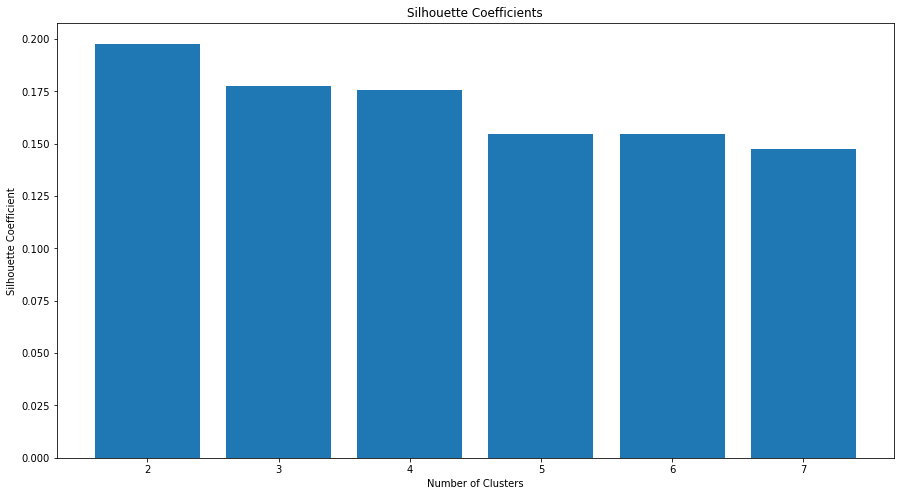

In [52]:
# set the figure size using 'figsize'
plt.figure(figsize=(15,8))

# plot bar plot of silhouette coefficients
# last number in the range() is exclusive
plt.bar(range(2,8), silhouette_coefficients)

# add axes and plot labels
plt.title('Silhouette Coefficients')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

# display the bar plot
plt.show()


In [53]:
Kmeans3=KMeans(n_clusters =2, random_state = 15, max_iter = 200, tol = 0.001)

# fit the model on the scaled data
Kmeans3.fit(X_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=15, tol=0.001, verbose=0)

In [54]:
result = Kmeans3.labels_

# create a dataframe of cluster labels
# pass the column name to the parameter 'cluster'
result = pd.DataFrame(result, columns = ["cluster"])

# group the data based on cluster labels and get size of each cluster
obs = result.groupby('cluster').size()

# print the cluster size
obs

cluster
0     76458
1    115237
dtype: int64

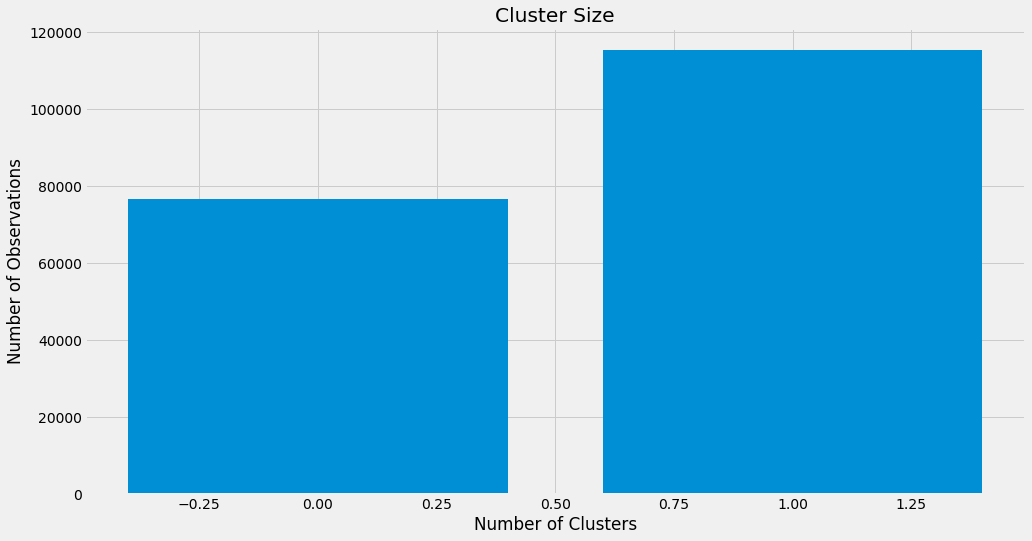

In [55]:
# plot the number of observations in each cluster

# select style of histogram
plt.style.use("fivethirtyeight")

# set the figure size using 'figsize'
plt.figure(figsize=(15,8))

# plot the barplot of number of observations in each cluster
# last number in the range() is exclusive
plt.bar(range(0,2), obs)

# set the plot and axes labels
plt.title('Cluster Size')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Observations')

# to show the barplot
plt.show()


In [56]:
ypred=Kmeans3.predict(X_test)
ypred=pd.Series(ypred)

In [57]:
score = silhouette_score(X_test,ypred, random_state=10)
score

0.19690348306971128

In [58]:
X_test['Cluster']=ypred

C:\Users\aswin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


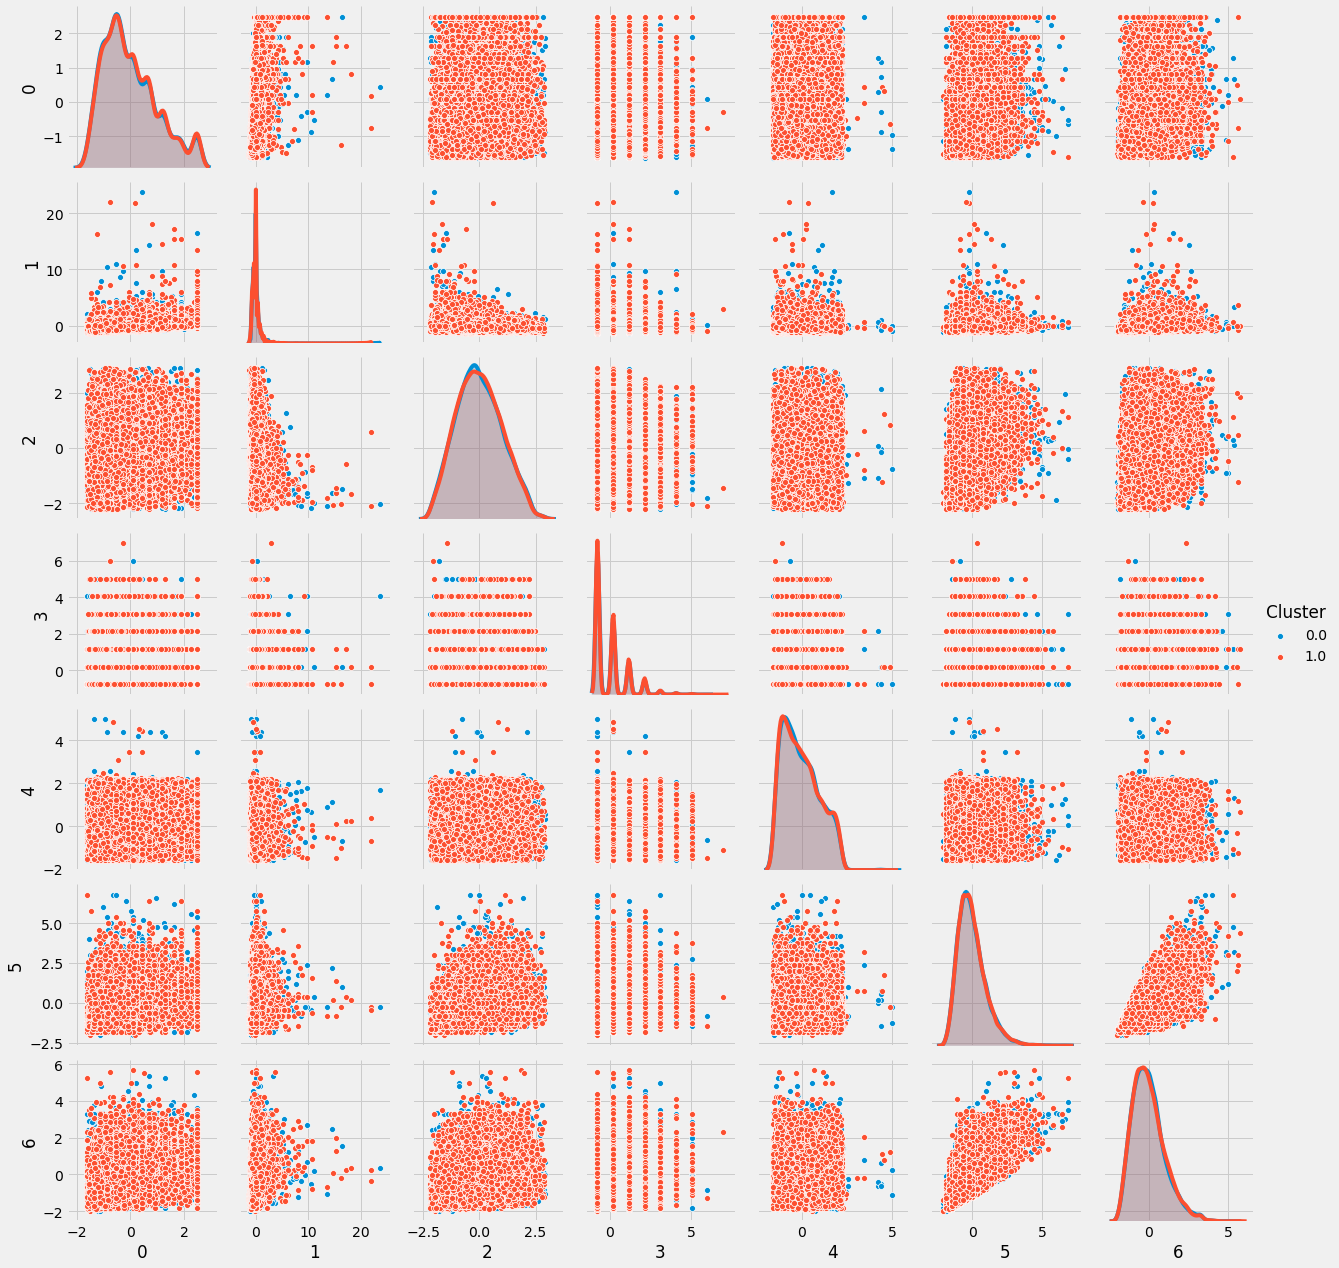

In [59]:
sns.pairplot(X_test,hue='Cluster')

In [60]:
#The base model gives 2 clusters .Hence this is overlapping cluster.

In [61]:
Loan_ID_train,Loan_ID_test=train_test_split(Loan_ID,test_size=0.30,random_state=10)

In [62]:
Loan_ID_train.values

array([10263522, 10225390, 10144124, ..., 10269905, 10257863, 10127129],
      dtype=int64)

In [63]:
result['cluster'].values

array([0, 0, 0, ..., 0, 0, 1])

In [64]:
train_results=pd.DataFrame({'Loan_ID':Loan_ID_train.values,
                           'cluster_Kmeans_base':result['cluster'].values})


In [65]:
train_results

,Loan_ID,cluster_Kmeans_base
0,10263522,0
1,10225390,0
2,10144124,0
3,10177945,1
4,10215321,1
...,...,...
191690,10272755,0
191691,10173682,1
191692,10269905,0
191693,10257863,0


In [66]:
test_results=pd.DataFrame({'Loan_ID':Loan_ID_test.values,
                           'cluster_Kmeans_base':ypred.values})


In [67]:
test_results

,Loan_ID,cluster_Kmeans_base
0,10042521,1
1,10006766,1
2,10026970,0
3,10107525,1
4,10024696,1
...,...,...
82150,10149904,1
82151,10221997,1
82152,10195477,0
82153,10098346,0


## Outlier Treatment

Loan_ID                        AxesSubplot(0.08,0.641765;0.18913x0.238235)
Annual_Income              AxesSubplot(0.306957,0.641765;0.18913x0.238235)
Debt_To_Income             AxesSubplot(0.533913,0.641765;0.18913x0.238235)
Inquiries_Last_6Mo          AxesSubplot(0.76087,0.641765;0.18913x0.238235)
Months_Since_Deliquency        AxesSubplot(0.08,0.355882;0.18913x0.238235)
Number_Open_Accounts       AxesSubplot(0.306957,0.355882;0.18913x0.238235)
Total_Accounts             AxesSubplot(0.533913,0.355882;0.18913x0.238235)
dtype: object

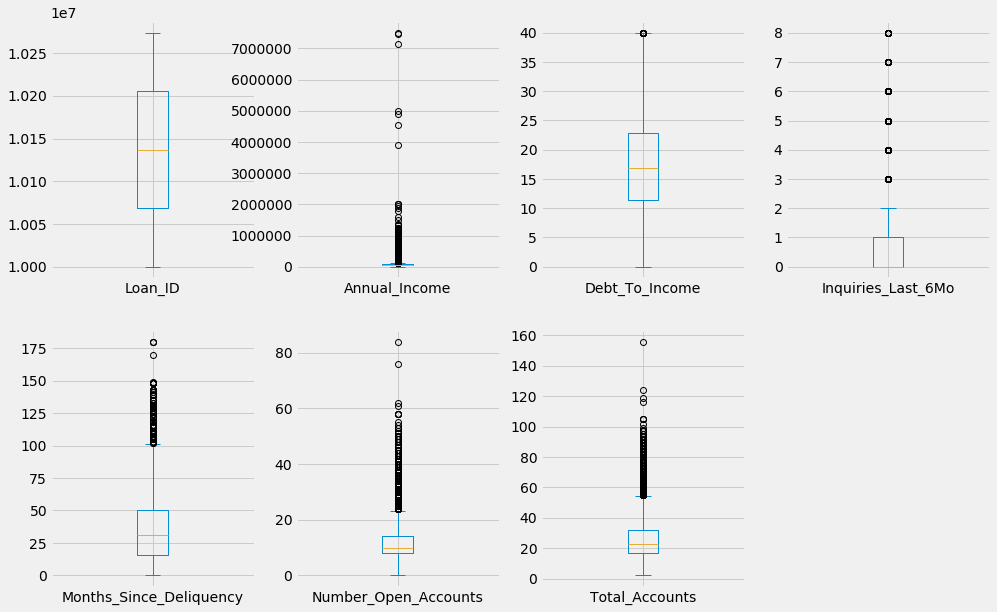

In [68]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,15))

### IQR method for removoing outliers from each of the 6 columns

In [69]:
#ANNUAL_INCOME
q1=df['Annual_Income'].quantile(0.25)
q3=df['Annual_Income'].quantile(0.75)

IQR= q3-q1
IQR

33400.0

In [70]:
lower_limit= q1 - 1.5*IQR
upper_limit= q3 + 1.5*IQR

In [71]:
df[(df['Annual_Income'] < lower_limit) | (df['Annual_Income'] > upper_limit)]
new_df=df[(df['Annual_Income'] > lower_limit) & (df['Annual_Income'] < upper_limit)]

In [72]:
new_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,27500,10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,26000,10+ years,Mortgage,110000.0,not verified,credit_card,11.37,0,68.0,6,23,Male
2,10164312,6075,< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,68.0,5,20,Male
3,10164313,12000,10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,68.0,6,8,Male
5,10164315,8000,6 years,Mortgage,39432.0,VERIFIED - income source,home_improvement,0.00,2,26.0,2,3,Female


In [73]:
#Inquiries_Last_6Mo

q1=new_df['Inquiries_Last_6Mo'].quantile(0.25)
q3=new_df['Inquiries_Last_6Mo'].quantile(0.75)

IQR= q3-q1
IQR

1.0

In [74]:
lower_limit= q1 - 1.5*IQR
upper_limit= q3 + 1.5*IQR

In [75]:
new_df[(new_df['Inquiries_Last_6Mo'] < lower_limit) | (new_df['Inquiries_Last_6Mo'] > upper_limit)]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
7,10164317,33425,1 year,Mortgage,75000.0,VERIFIED - income,credit_card,20.86,3,26.0,19,24,Female
17,10164327,25000,< 1 year,Rent,73000.0,VERIFIED - income,debt_consolidation,22.60,3,68.0,23,63,Male
22,10164332,20000,10+ years,Mortgage,75000.0,VERIFIED - income,debt_consolidation,24.96,3,65.0,17,36,Male
25,10164335,1600,7 years,Rent,53000.0,not verified,other,15.67,3,47.0,6,14,Male
44,10164354,15000,10+ years,Mortgage,80000.0,VERIFIED - income source,home_improvement,7.52,6,53.0,20,38,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273788,10164248,12000,2 years,Mortgage,58000.0,not verified,debt_consolidation,17.09,3,70.0,12,20,Female
273802,10164262,10000,3 years,Mortgage,73000.0,not verified,major_purchase,16.52,3,20.0,6,6,Male
273820,10164280,3200,10+ years,Mortgage,40800.0,not verified,home_improvement,0.56,3,5.0,4,20,Male
273830,10164290,8000,2 years,Rent,73000.0,VERIFIED - income source,debt_consolidation,21.08,3,28.0,6,19,Male


In [76]:

new_df1=new_df[(new_df['Inquiries_Last_6Mo'] > lower_limit) & (new_df['Inquiries_Last_6Mo'] < upper_limit)]

In [77]:
new_df1

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,27500,10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,26000,10+ years,Mortgage,110000.0,not verified,credit_card,11.37,0,68.0,6,23,Male
2,10164312,6075,< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,68.0,5,20,Male
3,10164313,12000,10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,68.0,6,8,Male
5,10164315,8000,6 years,Mortgage,39432.0,VERIFIED - income source,home_improvement,0.00,2,26.0,2,3,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273845,10164305,20725,10+ years,Rent,73000.0,VERIFIED - income source,credit_card,13.56,0,37.0,13,16,Male
273846,10164306,6000,8 years,Own,73000.0,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male
273847,10164307,20250,10+ years,Mortgage,73000.0,VERIFIED - income,credit_card,18.17,1,36.0,17,30,Male
273848,10164308,10000,4 years,Rent,73000.0,not verified,major_purchase,18.75,1,48.0,16,62,Female


In [78]:
#Debt_To_Income

q1=new_df1['Debt_To_Income'].quantile(0.25)
q3=new_df1['Debt_To_Income'].quantile(0.75)

IQR= q3-q1
IQR

11.39

In [79]:
lower_limit= q1 - 1.5*IQR
upper_limit= q3 + 1.5*IQR

In [80]:
new_df1[(new_df1['Debt_To_Income'] < lower_limit) | (new_df1['Debt_To_Income'] > upper_limit)]


new_df2=new_df1[(new_df1['Debt_To_Income'] > lower_limit) & (new_df1['Debt_To_Income'] < upper_limit)]

In [81]:
new_df2

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,27500,10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,26000,10+ years,Mortgage,110000.0,not verified,credit_card,11.37,0,68.0,6,23,Male
2,10164312,6075,< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,68.0,5,20,Male
3,10164313,12000,10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,68.0,6,8,Male
5,10164315,8000,6 years,Mortgage,39432.0,VERIFIED - income source,home_improvement,0.00,2,26.0,2,3,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273845,10164305,20725,10+ years,Rent,73000.0,VERIFIED - income source,credit_card,13.56,0,37.0,13,16,Male
273846,10164306,6000,8 years,Own,73000.0,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male
273847,10164307,20250,10+ years,Mortgage,73000.0,VERIFIED - income,credit_card,18.17,1,36.0,17,30,Male
273848,10164308,10000,4 years,Rent,73000.0,not verified,major_purchase,18.75,1,48.0,16,62,Female


In [82]:
#Months_Since_Deliquency

q1=new_df2['Months_Since_Deliquency'].quantile(0.25)
q3=new_df2['Months_Since_Deliquency'].quantile(0.75)

IQR= q3-q1
IQR

34.0

In [83]:
lower_limit= q1 - 1.5*IQR
upper_limit= q3 + 1.5*IQR

In [84]:
new_df2[(new_df2['Months_Since_Deliquency'] < lower_limit) | (new_df2['Months_Since_Deliquency'] > upper_limit)]


new_df3=new_df2[(new_df2['Months_Since_Deliquency'] > lower_limit) & (new_df2['Months_Since_Deliquency'] < upper_limit)]

In [85]:
new_df3

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,27500,10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,26000,10+ years,Mortgage,110000.0,not verified,credit_card,11.37,0,68.0,6,23,Male
2,10164312,6075,< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,68.0,5,20,Male
3,10164313,12000,10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,68.0,6,8,Male
5,10164315,8000,6 years,Mortgage,39432.0,VERIFIED - income source,home_improvement,0.00,2,26.0,2,3,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273845,10164305,20725,10+ years,Rent,73000.0,VERIFIED - income source,credit_card,13.56,0,37.0,13,16,Male
273846,10164306,6000,8 years,Own,73000.0,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male
273847,10164307,20250,10+ years,Mortgage,73000.0,VERIFIED - income,credit_card,18.17,1,36.0,17,30,Male
273848,10164308,10000,4 years,Rent,73000.0,not verified,major_purchase,18.75,1,48.0,16,62,Female


In [86]:
#Number_Open_Accounts

q1=new_df3 ['Number_Open_Accounts'].quantile(0.25)
q3=new_df3['Number_Open_Accounts'].quantile(0.75)

IQR= q3-q1
IQR

6.0

In [87]:
lower_limit= q1 - 1.5*IQR
upper_limit= q3 + 1.5*IQR

In [88]:
new_df3[(new_df3['Number_Open_Accounts'] < lower_limit) | (new_df3['Number_Open_Accounts'] > upper_limit)]


new_df4=new_df3[(new_df3['Number_Open_Accounts'] > lower_limit) & (new_df3['Number_Open_Accounts'] < upper_limit)]

In [89]:
new_df4

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,27500,10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,26000,10+ years,Mortgage,110000.0,not verified,credit_card,11.37,0,68.0,6,23,Male
2,10164312,6075,< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,68.0,5,20,Male
3,10164313,12000,10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,68.0,6,8,Male
5,10164315,8000,6 years,Mortgage,39432.0,VERIFIED - income source,home_improvement,0.00,2,26.0,2,3,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273845,10164305,20725,10+ years,Rent,73000.0,VERIFIED - income source,credit_card,13.56,0,37.0,13,16,Male
273846,10164306,6000,8 years,Own,73000.0,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male
273847,10164307,20250,10+ years,Mortgage,73000.0,VERIFIED - income,credit_card,18.17,1,36.0,17,30,Male
273848,10164308,10000,4 years,Rent,73000.0,not verified,major_purchase,18.75,1,48.0,16,62,Female


In [90]:
#Total_Accounts

q1=new_df4['Total_Accounts'].quantile(0.25)
q3=new_df4['Total_Accounts'].quantile(0.75)

IQR= q3-q1
IQR

14.0

In [91]:
lower_limit= q1 - 1.5*IQR
upper_limit= q3 + 1.5*IQR

In [92]:
new_df4[(new_df4['Total_Accounts'] < lower_limit) | (new_df4['Total_Accounts'] > upper_limit)]


new_df5=new_df4[(new_df4['Total_Accounts'] > lower_limit) & (new_df4['Total_Accounts'] < upper_limit)]

In [93]:
new_df5

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,27500,10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,26000,10+ years,Mortgage,110000.0,not verified,credit_card,11.37,0,68.0,6,23,Male
2,10164312,6075,< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,68.0,5,20,Male
3,10164313,12000,10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,68.0,6,8,Male
5,10164315,8000,6 years,Mortgage,39432.0,VERIFIED - income source,home_improvement,0.00,2,26.0,2,3,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273844,10164304,35000,10+ years,Rent,115000.0,VERIFIED - income,debt_consolidation,24.06,0,37.0,10,39,Male
273845,10164305,20725,10+ years,Rent,73000.0,VERIFIED - income source,credit_card,13.56,0,37.0,13,16,Male
273846,10164306,6000,8 years,Own,73000.0,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male
273847,10164307,20250,10+ years,Mortgage,73000.0,VERIFIED - income,credit_card,18.17,1,36.0,17,30,Male


Loan_ID                        AxesSubplot(0.08,0.641765;0.18913x0.238235)
Annual_Income              AxesSubplot(0.306957,0.641765;0.18913x0.238235)
Debt_To_Income             AxesSubplot(0.533913,0.641765;0.18913x0.238235)
Inquiries_Last_6Mo          AxesSubplot(0.76087,0.641765;0.18913x0.238235)
Months_Since_Deliquency        AxesSubplot(0.08,0.355882;0.18913x0.238235)
Number_Open_Accounts       AxesSubplot(0.306957,0.355882;0.18913x0.238235)
Total_Accounts             AxesSubplot(0.533913,0.355882;0.18913x0.238235)
dtype: object

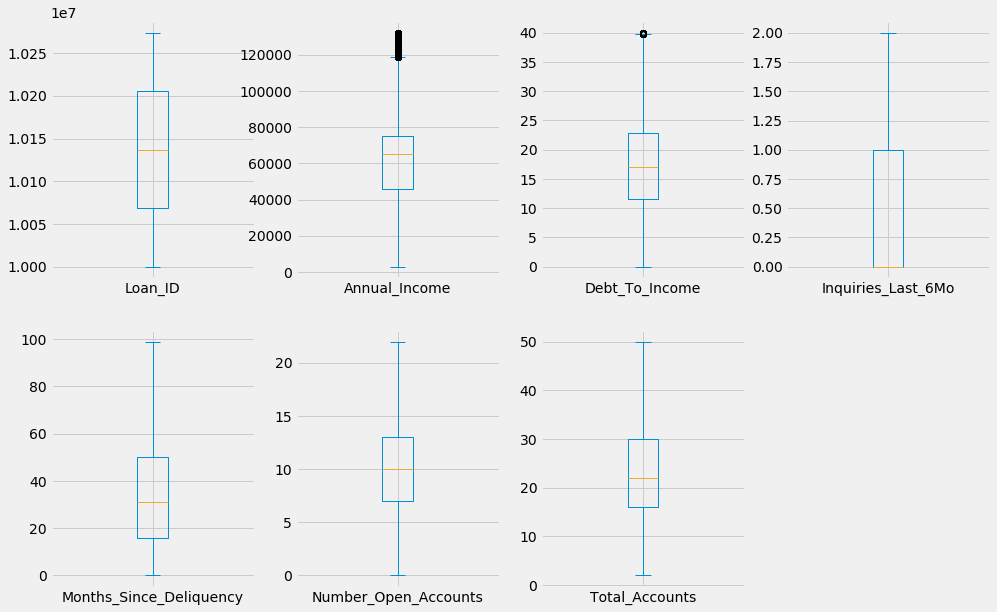

In [94]:
new_df5.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,15))

In [95]:
 len(new_df5)

227987

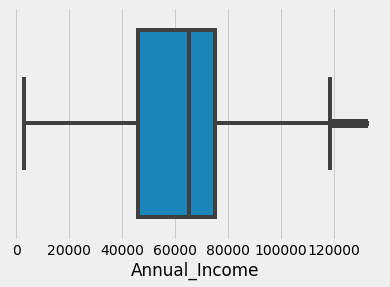

In [96]:
sns.boxplot(new_df5['Annual_Income'])

In [97]:
ann_inc_grt120k=new_df5[new_df5['Annual_Income']>120000].index

In [98]:
new_df5.drop(ann_inc_grt120k,inplace=True)

C:\Users\aswin\anaconda3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


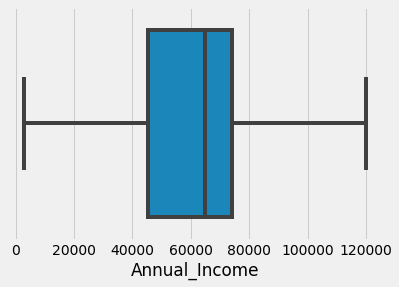

In [99]:
sns.boxplot(new_df5['Annual_Income'],whis=3)

In [100]:
len(new_df5)

223488

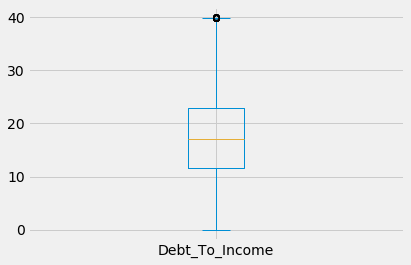

In [101]:
new_df5['Debt_To_Income'].plot(kind='box')

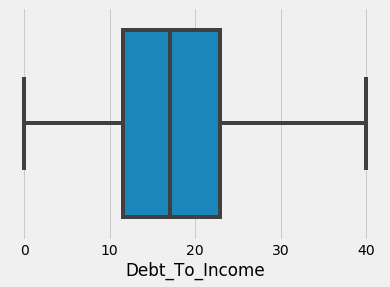

In [102]:
sns.boxplot(new_df5['Debt_To_Income'],whis=3)

Loan_ID                        AxesSubplot(0.08,0.641765;0.18913x0.238235)
Annual_Income              AxesSubplot(0.306957,0.641765;0.18913x0.238235)
Debt_To_Income             AxesSubplot(0.533913,0.641765;0.18913x0.238235)
Inquiries_Last_6Mo          AxesSubplot(0.76087,0.641765;0.18913x0.238235)
Months_Since_Deliquency        AxesSubplot(0.08,0.355882;0.18913x0.238235)
Number_Open_Accounts       AxesSubplot(0.306957,0.355882;0.18913x0.238235)
Total_Accounts             AxesSubplot(0.533913,0.355882;0.18913x0.238235)
dtype: object

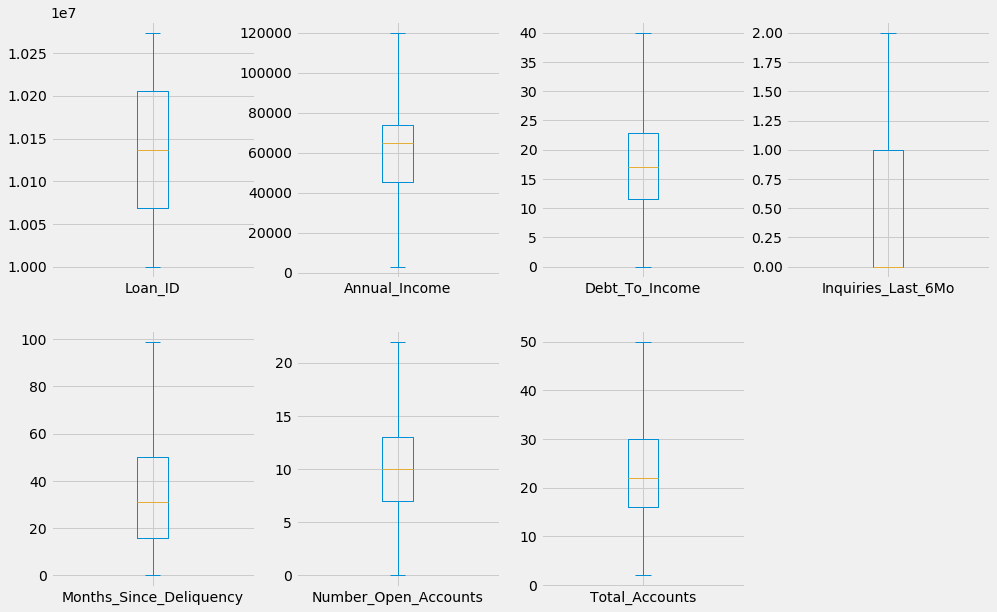

In [103]:
new_df5.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,15),whis=3)

In [104]:
new_df5.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
1,10164311,26000,10+ years,Mortgage,110000.0,not verified,credit_card,11.37,0,68.0,6,23,Male
2,10164312,6075,< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,68.0,5,20,Male
3,10164313,12000,10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,68.0,6,8,Male
5,10164315,8000,6 years,Mortgage,39432.0,VERIFIED - income source,home_improvement,0.00,2,26.0,2,3,Female
6,10164316,12600,8 years,Mortgage,57408.0,VERIFIED - income,debt_consolidation,22.89,1,26.0,9,20,Male


In [105]:
new_df5.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
dtype: int64

##### After outlier removal the no of records came down to 227,987 from 273850

## Distributions of variables

In [106]:
new_df5.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
1,10164311,26000,10+ years,Mortgage,110000.0,not verified,credit_card,11.37,0,68.0,6,23,Male
2,10164312,6075,< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,68.0,5,20,Male
3,10164313,12000,10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,68.0,6,8,Male
5,10164315,8000,6 years,Mortgage,39432.0,VERIFIED - income source,home_improvement,0.00,2,26.0,2,3,Female
6,10164316,12600,8 years,Mortgage,57408.0,VERIFIED - income,debt_consolidation,22.89,1,26.0,9,20,Male


## Univariate analysis

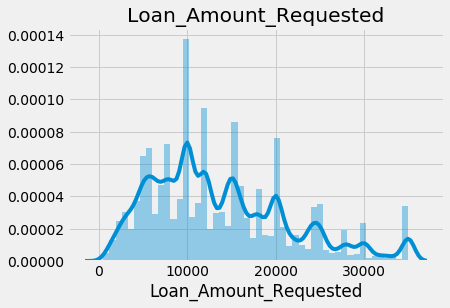

In [107]:
sns.distplot(new_df5['Loan_Amount_Requested'])
plt.title('Loan_Amount_Requested')
plt.show()

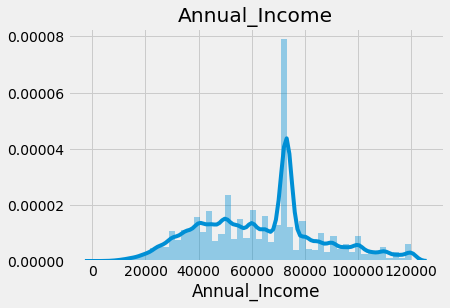

In [108]:
sns.distplot(new_df5['Annual_Income'])
plt.title('Annual_Income')
plt.show()

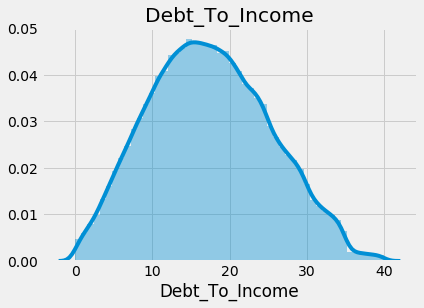

In [109]:
sns.distplot(new_df5['Debt_To_Income'])
plt.title('Debt_To_Income')
plt.show()

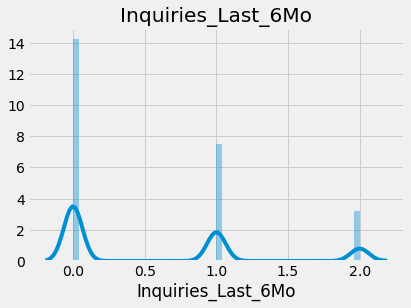

In [110]:
sns.distplot(new_df5['Inquiries_Last_6Mo'])
plt.title('Inquiries_Last_6Mo')
plt.show()

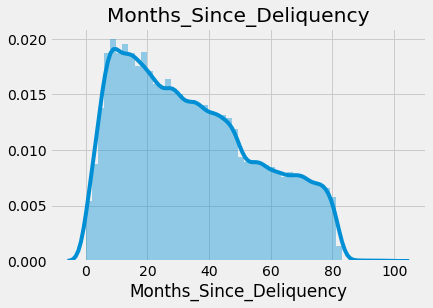

In [111]:
sns.distplot(new_df5['Months_Since_Deliquency'])
plt.title('Months_Since_Deliquency')
plt.show()

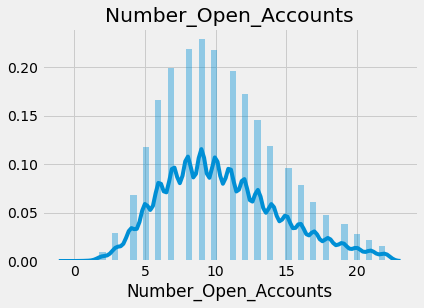

In [112]:
sns.distplot(new_df5['Number_Open_Accounts'])
plt.title('Number_Open_Accounts')
plt.show()

## Bivariate Analysis

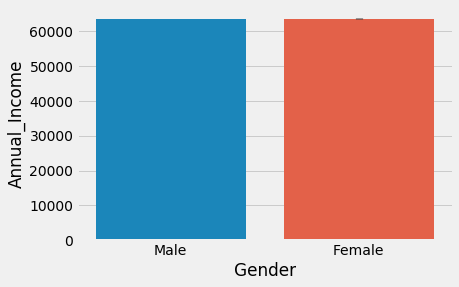

In [113]:
sns.barplot(x='Gender',y='Annual_Income',data=new_df5)

In [114]:
#Salary is almost same irrespective of gender

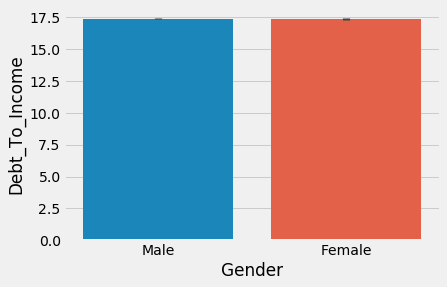

In [115]:
sns.barplot(x='Gender',y='Debt_To_Income',data=new_df5)

In [116]:
new_df5['Loan_Amount_Requested']=new_df5['Loan_Amount_Requested'].astype('float')

C:\Users\aswin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


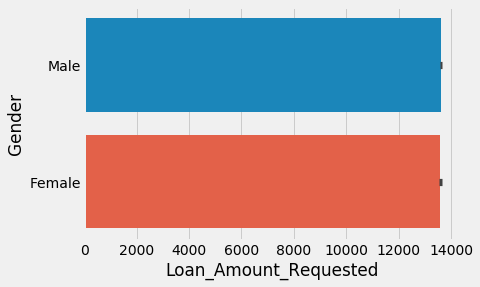

In [117]:
sns.barplot(new_df5['Loan_Amount_Requested'],new_df5['Gender'])

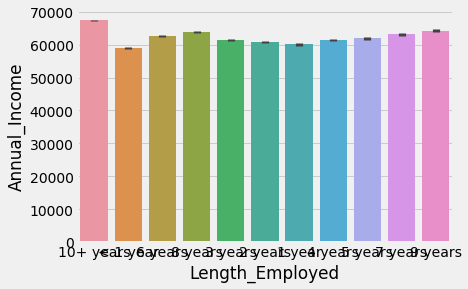

In [118]:
sns.barplot(new_df5['Length_Employed'],new_df5['Annual_Income'])

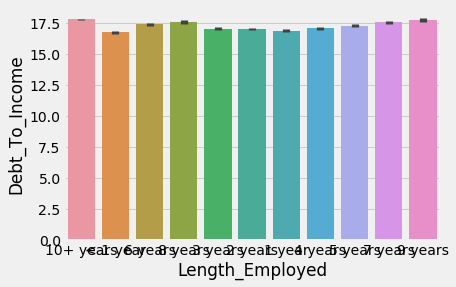

In [119]:
sns.barplot(new_df5['Length_Employed'],new_df5['Debt_To_Income'])

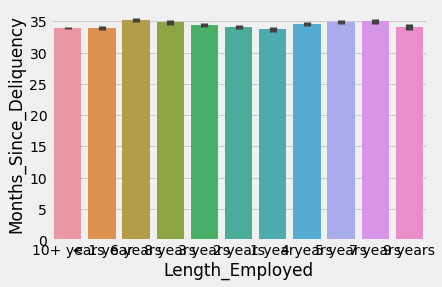

In [120]:
sns.barplot(new_df5['Length_Employed'],new_df5['Months_Since_Deliquency'])

## Perform label encoding for categorical variables

In [121]:
# Creating a dummy variable for the variable 'length employed' and dropping the first one.
cont = pd.get_dummies(df['Length_Employed'],prefix='Length_Employed',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,cont],axis=1)

# Creating a dummy variable for the variable 'Home owner' and dropping the first one.
pm = pd.get_dummies(df['Home_Owner'],prefix='Home_Owner',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,pm],axis=1)

# Creating a dummy variable for the variable 'Income verified' and dropping the first one.
gen = pd.get_dummies(df['Income_Verified'],prefix='Income_Verified',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,gen],axis=1)

# Creating a dummy variable for the variable 'Purpose of loan' and dropping the first one.
ml = pd.get_dummies(df['Purpose_Of_Loan'],prefix='Purpose_Of_Loan',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,ml],axis=1)

# Creating a dummy variable for the variable 'Gender' and dropping the first one.
iser = pd.get_dummies(df['Gender'],prefix='Gender',drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,iser],axis=1)



In [122]:
#The varaible was imported as a string we need to convert it to float
df['Loan_Amount_Requested'] =pd.to_numeric(df['Loan_Amount_Requested'],downcast='float',
                                           errors='coerce')

In [123]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,10164310,27500.0,10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,...,0,0,0,0,0,0,0,0,0,1
1,10164311,26000.0,10+ years,Mortgage,110000.0,not verified,credit_card,11.37,0,68.0,...,0,0,0,0,0,0,0,0,0,1
2,10164312,6075.0,< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,68.0,...,0,0,0,0,0,0,0,0,0,1
3,10164313,12000.0,10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,68.0,...,0,0,0,0,0,0,0,0,0,1
4,10164314,35000.0,< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,...,0,0,0,0,0,0,0,0,0,1


In [124]:
df_num=df[['Loan_Amount_Requested','Annual_Income','Debt_To_Income','Inquiries_Last_6Mo',
         'Months_Since_Deliquency','Number_Open_Accounts','Total_Accounts']]

In [125]:
df_new=df.sample(n=20000,random_state=10)

In [126]:
df_new

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
152061,10042521,16000.0,2 years,Mortgage,100000.0,not verified,debt_consolidation,6.92,3,12.0,...,0,0,0,0,0,0,0,0,0,1
116306,10006766,3475.0,10+ years,Rent,40000.0,not verified,other,13.92,1,7.0,...,0,0,0,0,1,0,0,0,0,1
136510,10026970,24000.0,8 years,Mortgage,70000.0,VERIFIED - income source,credit_card,30.45,0,7.0,...,0,0,0,0,0,0,0,0,0,1
217065,10107525,10000.0,10+ years,Mortgage,87000.0,VERIFIED - income source,debt_consolidation,13.88,1,22.0,...,0,0,0,0,0,0,0,0,0,1
134236,10024696,4400.0,2 years,Rent,50000.0,VERIFIED - income source,credit_card,16.46,0,32.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22159,10186469,15000.0,< 1 year,Rent,55000.0,VERIFIED - income,credit_card,8.53,4,34.0,...,0,0,0,0,0,0,0,0,0,0
84377,10248687,19000.0,< 1 year,Mortgage,130000.0,VERIFIED - income,debt_consolidation,17.44,1,72.0,...,0,0,0,0,0,0,0,0,0,1
207263,10097723,10000.0,5 years,Own,58000.0,VERIFIED - income source,debt_consolidation,19.43,0,9.0,...,0,0,0,0,0,0,0,0,0,1
79748,10244058,15000.0,< 1 year,Rent,53000.0,VERIFIED - income source,debt_consolidation,24.41,0,54.0,...,0,0,0,0,0,0,0,0,0,1


In [127]:
df_new.reset_index(drop=True,inplace=True)
df_new

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,10042521,16000.0,2 years,Mortgage,100000.0,not verified,debt_consolidation,6.92,3,12.0,...,0,0,0,0,0,0,0,0,0,1
1,10006766,3475.0,10+ years,Rent,40000.0,not verified,other,13.92,1,7.0,...,0,0,0,0,1,0,0,0,0,1
2,10026970,24000.0,8 years,Mortgage,70000.0,VERIFIED - income source,credit_card,30.45,0,7.0,...,0,0,0,0,0,0,0,0,0,1
3,10107525,10000.0,10+ years,Mortgage,87000.0,VERIFIED - income source,debt_consolidation,13.88,1,22.0,...,0,0,0,0,0,0,0,0,0,1
4,10024696,4400.0,2 years,Rent,50000.0,VERIFIED - income source,credit_card,16.46,0,32.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10186469,15000.0,< 1 year,Rent,55000.0,VERIFIED - income,credit_card,8.53,4,34.0,...,0,0,0,0,0,0,0,0,0,0
19996,10248687,19000.0,< 1 year,Mortgage,130000.0,VERIFIED - income,debt_consolidation,17.44,1,72.0,...,0,0,0,0,0,0,0,0,0,1
19997,10097723,10000.0,5 years,Own,58000.0,VERIFIED - income source,debt_consolidation,19.43,0,9.0,...,0,0,0,0,0,0,0,0,0,1
19998,10244058,15000.0,< 1 year,Rent,53000.0,VERIFIED - income source,debt_consolidation,24.41,0,54.0,...,0,0,0,0,0,0,0,0,0,1


In [136]:
df_new.drop('Loan_ID',axis=1,inplace=True)

In [137]:
df_new.to_csv('file_modified.csv')

In [138]:
df_new.isna().sum()

Loan_Amount_Requested                       0
Length_Employed                             0
Home_Owner                                  0
Annual_Income                               0
Income_Verified                             0
Purpose_Of_Loan                             0
Debt_To_Income                              0
Inquiries_Last_6Mo                          0
Months_Since_Deliquency                     0
Number_Open_Accounts                        0
Total_Accounts                              0
Gender                                      0
Length_Employed_10+ years                   0
Length_Employed_2 years                     0
Length_Employed_3 years                     0
Length_Employed_4 years                     0
Length_Employed_5 years                     0
Length_Employed_6 years                     0
Length_Employed_7 years                     0
Length_Employed_8 years                     0
Length_Employed_9 years                     0
Length_Employed_< 1 year          

In [139]:
train_results.to_csv('train_base_model.csv')

In [140]:
test_results.to_csv('test_base_model.csv')

In [141]:
Loan_ID

0         10164310
1         10164311
2         10164312
3         10164313
4         10164314
            ...   
273845    10164305
273846    10164306
273847    10164307
273848    10164308
273849    10164309
Name: Loan_ID, Length: 273850, dtype: int64

In [142]:
Loan_ID_new=Loan_ID.sample(n=20000,random_state=10)

In [143]:
Loan_ID_new.to_csv('Loan_ID_new.csv')